In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

a = torch.arange(0, 1, 0.001).to(device)

precise = torch.exp(a).to(device)

point = 0.5
scale = torch.exp(torch.tensor([point])).to(device)
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118)
max error rate: tensor(-0.0001)
avg error rate: tensor(-0.0053)
rms error rate: tensor(0.0056)


# point search test

In [37]:
intwidth = 7
fracwidth = 24

## test exp

### fxp guassian

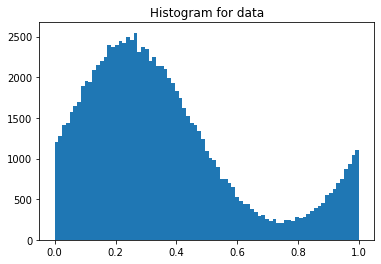

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642347515', '-0.0802981108', '-0.0189870223', '-0.0036595582', '-0.0005941578', '-0.0000832496', '-0.0000103514', '-0.0000012326']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001174', '0.0000001174', '0.0000001174', '0.0000001174', '0.0000001174']
avg error: ['-0.0619192868', '-0.0121287014', '-0.0021346649', '-0.0003359756', '-0.0000471100', '-0.0000058940', '-0.0000006606', '-0.0000000661']
rms error: ['0.0927540138', '0.0233805329', '0.0049557816', '0.0008840127', '0.0001348769', '0.0000179124', '0.0000021019', '0.0000002224']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733523458', '-0.0405030

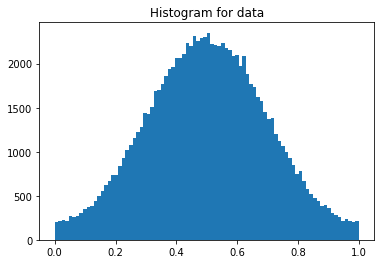

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642362714', '-0.0802990049', '-0.0189873837', '-0.0036597184', '-0.0005941506', '-0.0000833249', '-0.0000103498', '-0.0000012308']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001168', '0.0000001168', '0.0000001168', '0.0000001168', '0.0000001168']
avg error: ['-0.0963398069', '-0.0186138228', '-0.0029583685', '-0.0004030594', '-0.0000483256', '-0.0000051890', '-0.0000005042', '-0.0000000436']
rms error: ['0.1119525209', '0.0245983899', '0.0045023644', '0.0007085576', '0.0000978043', '0.0000120061', '0.0000013244', '0.0000001365']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733539104', '-0.040503807

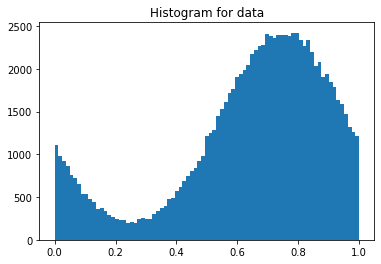

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642320395', '-0.0802968591', '-0.0189866368', '-0.0036594975', '-0.0005940945', '-0.0000833286', '-0.0000103511', '-0.0000012360']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001165', '0.0000001165', '0.0000001165', '0.0000001165', '0.0000001165']
avg error: ['-0.1450343579', '-0.0344134569', '-0.0065213572', '-0.0010312943', '-0.0001402287', '-0.0000167442', '-0.0000017821', '-0.0000001703']
rms error: ['0.1616804749', '0.0408058539', '0.0082689570', '0.0014006807', '0.0002038154', '0.0000259823', '0.0000029443', '0.0000003028']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733497679', '-0.0405022

In [38]:
point_search(func="exp", uniform=False, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

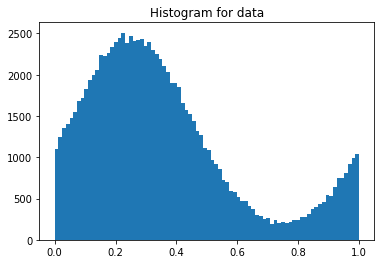

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.0617044233', '-0.0120160226', '-0.0021056982', '-0.0003305330', '-0.0000462740', '-0.0000057848', '-0.0000006519', '-0.0000000704']
rms error: ['0.0921736285', '0.0231786687', '0.0049082562', '0.0008750202', '0.0001334319', '0.0000177094', '0.0000020746', '0.0000002198']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

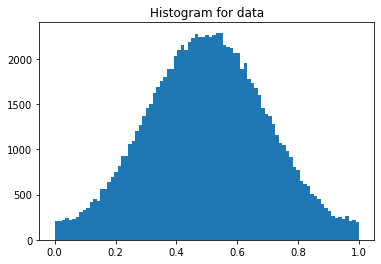

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.0961392000', '-0.0185434502', '-0.0029427567', '-0.0004004631', '-0.0000479765', '-0.0000051510', '-0.0000005048', '-0.0000000503']
rms error: ['0.1116800383', '0.0245118439', '0.0044842409', '0.0007056722', '0.0000974278', '0.0000119626', '0.0000013185', '0.0000001426']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

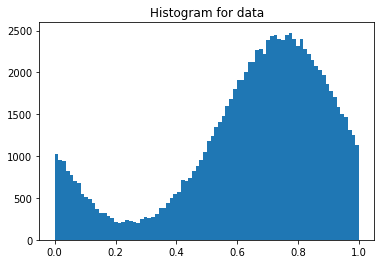

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.1452626586', '-0.0344515853', '-0.0065235561', '-0.0010306210', '-0.0001399751', '-0.0000166905', '-0.0000017716', '-0.0000001659']
rms error: ['0.1617374122', '0.0407819077', '0.0082545299', '0.0013965917', '0.0002029912', '0.0000258463', '0.0000029199', '0.0000002959']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

In [5]:
point_search(func="exp", uniform=False, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

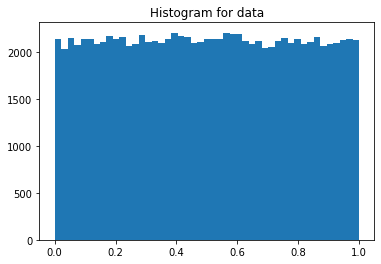

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642347515', '-0.0802981853', '-0.0189870205', '-0.0036595094', '-0.0005941594', '-0.0000833262', '-0.0000103527', '-0.0000012333']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001181', '0.0000001181', '0.0000001181', '0.0000001181', '0.0000001181']
avg error: ['-0.1034491807', '-0.0232669041', '-0.0043324907', '-0.0006860960', '-0.0000943419', '-0.0000114478', '-0.0000012406', '-0.0000001205']
rms error: ['0.1318127513', '0.0333394371', '0.0068612061', '0.0011838431', '0.0001753698', '0.0000227220', '0.0000026125', '0.0000002718']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733524203', '-0.040503095

In [39]:
point_search(func="exp", uniform=True, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

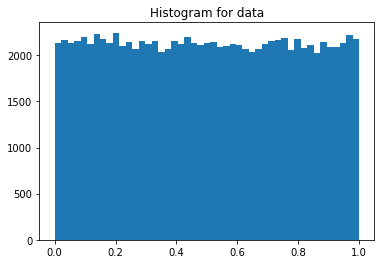

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.1032798216', '-0.0232699420', '-0.0043405378', '-0.0006883879', '-0.0000947734', '-0.0000115114', '-0.0000012498', '-0.0000001229']
rms error: ['0.1318960637', '0.0334064402', '0.0068819886', '0.0011883909', '0.0001761623', '0.0000228351', '0.0000026225', '0.0000002708']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

In [7]:
point_search(func="exp", uniform=True, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test div

### fxp guassian

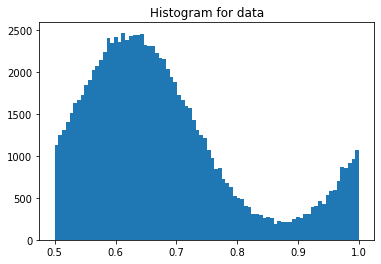

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2499996424', '-0.1249997318', '-0.0624998063', '-0.0312499031', '-0.0156249516', '-0.0078125056', '-0.0039062528', '-0.0019531264']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000001058']
avg error: ['-0.1190912798', '-0.0463044010', '-0.0186193790', '-0.0076849097', '-0.0032397748', '-0.0013900328', '-0.0006052774', '-0.0002668930']
rms error: ['0.1364528388', '0.0569190197', '0.0246023778', '0.0109067867', '0.0049265968', '0.0022572600', '0.0010457650', '0.0004887856']



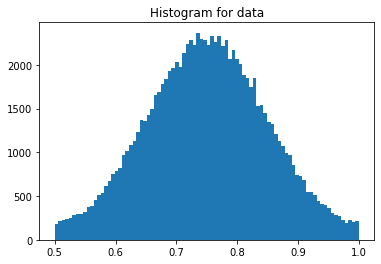

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2499458790', '-0.1249594018', '-0.0624729060', '-0.0312330555', '-0.0156148290', '-0.0078065502', '-0.0039028577', '-0.0019511904']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000001059']
avg error: ['-0.0721732453', '-0.0228768475', '-0.0077802720', '-0.0027976411', '-0.0010524640', '-0.0004109096', '-0.0001654442', '-0.0000683464']
rms error: ['0.0882058591', '0.0324417092', '0.0128625091', '0.0053711673', '0.0023266743', '0.0010348801', '0.0004693508', '0.0002159985']



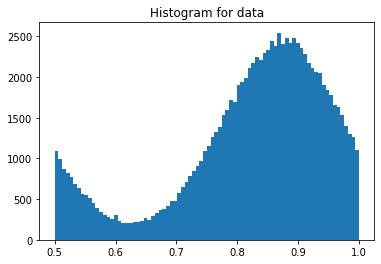

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2499911785', '-0.1249933839', '-0.0624956191', '-0.0312472135', '-0.0156233683', '-0.0078115650', '-0.0039057229', '-0.0019528018']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000001059']
avg error: ['-0.0469253287', '-0.0157218762', '-0.0060799262', '-0.0025524956', '-0.0011228292', '-0.0005076357', '-0.0002334135', '-0.0001085217']
rms error: ['0.0779738873', '0.0335086621', '0.0152778402', '0.0071306094', '0.0033674892', '0.0016019259', '0.0007659766', '0.0003677173']



In [40]:
point_search(func="div", uniform=False, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

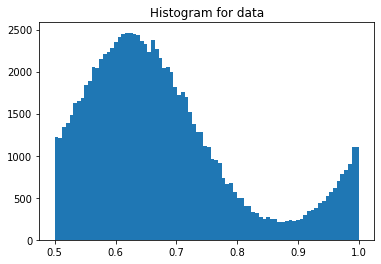

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.1187942475', '-0.0461726598', '-0.0185660087', '-0.0076646674', '-0.0032326023', '-0.0013877435', '-0.0006046839', '-0.0002668310']
rms error: ['0.1362569630', '0.0568560250', '0.0245903414', '0.0109099094', '0.0049322345', '0.0022618673', '0.0010488506', '0.0004906699']



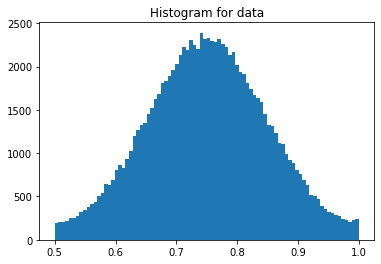

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0719374493', '-0.0227639657', '-0.0077289362', '-0.0027748246', '-0.0010424457', '-0.0004065325', '-0.0001635235', '-0.0000675014']
rms error: ['0.0879143551', '0.0322869755', '0.0127877789', '0.0053362721', '0.0023105056', '0.0010273616', '0.0004658390', '0.0002143567']



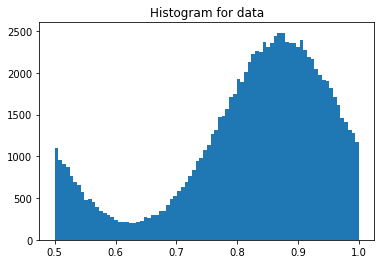

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0469829924', '-0.0157558993', '-0.0060989410', '-0.0025630340', '-0.0011285889', '-0.0005107230', '-0.0002350368', '-0.0001093672']
rms error: ['0.0780957341', '0.0335944593', '0.0153307766', '0.0071607246', '0.0033838642', '0.0016105927', '0.0007704844', '0.0003700361']



In [9]:
point_search(func="div", uniform=False, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

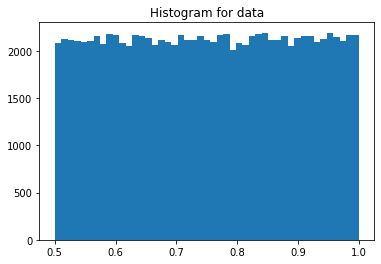

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2499910593', '-0.1249932945', '-0.0624955148', '-0.0312472209', '-0.0156233720', '-0.0078115668', '-0.0039057238', '-0.0019528023']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000001060']
avg error: ['-0.0830337629', '-0.0311226733', '-0.0124441441', '-0.0051830774', '-0.0022204656', '-0.0009710827', '-0.0004314310', '-0.0001940734']
rms error: ['0.1115533262', '0.0471218303', '0.0207708888', '0.0093906289', '0.0043176655', '0.0020091892', '0.0009434154', '0.0004460919']



In [41]:
point_search(func="div", uniform=True, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

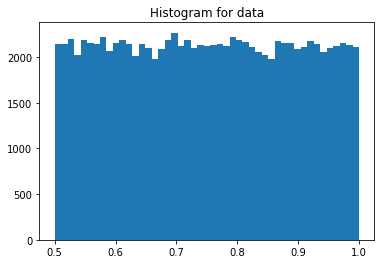

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0835939571', '-0.0313719139', '-0.0125570949', '-0.0052354163', '-0.0022451247', '-0.0009828135', '-0.0004370438', '-0.0001967706']
rms error: ['0.1120583639', '0.0473827720', '0.0209055375', '0.0094594769', '0.0043525966', '0.0020268362', '0.0009523164', '0.0004505817']



In [11]:
point_search(func="div", uniform=True, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test log

### fxp guassian

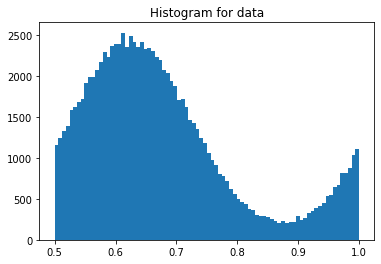

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-91929.8437500000', '-0.0000000000', '-41997.7500000000', '-0.0000000000', '-27018.1152343750', '-0.0000000964', '-19884.9492187500', '-0.0000001098']
max error: ['-0.0000000000', '57864.4726562500', '0.0000000871', '32898.4257812500', '0.0000000928', '22911.9960937500', '0.0000001050', '17562.1308593750']
avg error: ['-6.2969470024', '3.8898663521', '-2.7871150970', '2.1614005566', '-1.7600390911', '1.4813567400', '-1.2768644094', '1.1205775738']
rms error: ['363.6664733887', '228.9020996094', '166.1326293945', '130.1352539062', '106.8725891113', '90.6287078857', '78.6536102295', '69.4644851685']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.834792

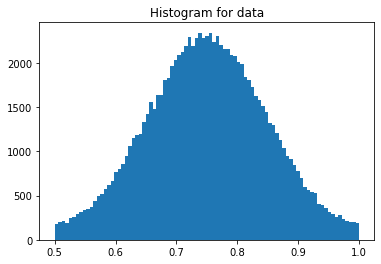

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-90317.0234375000', '-0.0000000000', '-41260.9140625000', '-0.0000000000', '-26544.0957031250', '-0.0000000961', '-19536.0722656250', '-0.0000001094']
max error: ['-0.0000000000', '56849.2890625000', '0.0000000871', '32321.2441406250', '0.0000000921', '22510.0156250000', '0.0000001050', '17253.9882812500']
avg error: ['-2.2465460300', '1.3001899719', '-0.8902928829', '0.6688733101', '-0.5325165391', '0.4409216940', '-0.3754836619', '0.3265425265']
rms error: ['292.1458740234', '183.8875427246', '133.4638214111', '104.5467071533', '85.8594131470', '72.8104324341', '63.1906776428', '55.8088607788']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.834792228

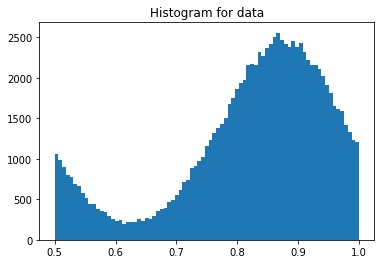

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-28599.6035156250', '-0.0000000000', '-13065.2304687500', '-0.0000000000', '-8404.9160156250', '-0.0000000962', '-6185.7167968750', '-0.0000001093']
max error: ['-0.0000000000', '18001.5253906250', '0.0000000870', '10234.3339843750', '0.0000000928', '7127.4619140625', '0.0000001028', '5463.0595703125']
avg error: ['-6.0155401230', '3.6031174660', '-2.5095064640', '1.8987257481', '-1.5137387514', '1.2510437965', '-1.0614495277', '0.9187666178']
rms error: ['138.1082000732', '86.9171066284', '63.0743103027', '49.4011611938', '40.5653152466', '34.3955726624', '29.8473033905', '26.3572444916']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
m

In [42]:
point_search(func="log", uniform=False, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

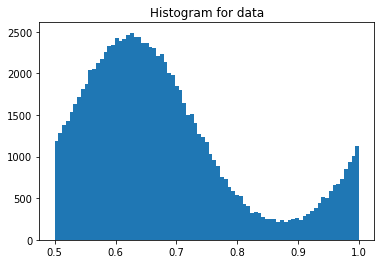

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-1.6925644875', '0.9925007224', '-0.6846835017', '0.5148153901', '-0.4080315232', '0.3350591362', '-0.2822289169', '0.2423352748']
rms error: ['7.9678211212', '4.9462628365', '3.5417876244', '2.7380793095', '2.2198917866', '1.8589351177', '1.5935235023', '1.3904045820']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

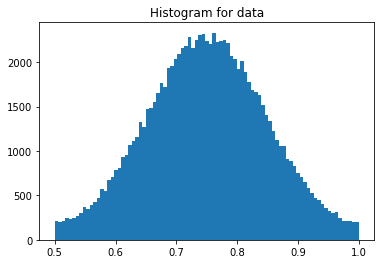

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-0.8621091247', '0.4307563305', '-0.2604929805', '0.1763121933', '-0.1285244673', '0.0986966416', '-0.0787431002', '0.0646705106']
rms error: ['3.6111457348', '2.2170584202', '1.5759402514', '1.2119811773', '0.9787576795', '0.8170865774', '0.6986770630', '0.6083543301']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '

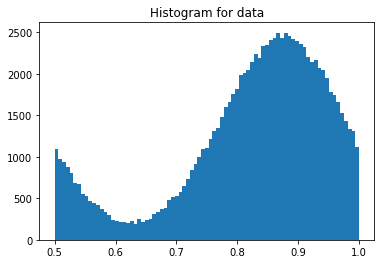

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-2.9648792744', '1.6846946478', '-1.1185613871', '0.8103033304', '-0.6208257675', '0.4946392179', '-0.4056717455', '0.3401950002']
rms error: ['8.4148511887', '5.1910929680', '3.6983721256', '2.8473358154', '2.3005132675', '1.9207814932', '1.6423541307', '1.4298154116']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

In [13]:
point_search(func="log", uniform=False, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

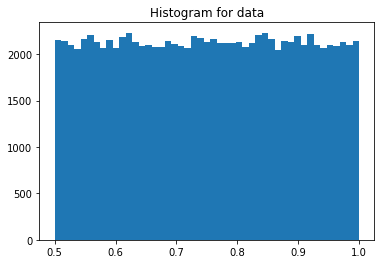

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-47666.7695312500', '-0.0000000000', '-21776.0957031250', '-0.0000000000', '-14008.8896484375', '-0.0000000972', '-10310.2255859375', '-0.0000001093']
max error: ['-0.0000000000', '30003.2734375000', '0.0000000871', '17057.9257812500', '0.0000000927', '11879.7949218750', '0.0000001036', '9105.7851562500']
avg error: ['-5.7438282967', '3.4866561890', '-2.4594268799', '1.8817888498', '-1.5147922039', '1.2623326778', '-1.0786914825', '0.9394657612']
rms error: ['192.7798156738', '121.3341979980', '88.0570602417', '68.9732742310', '56.6408081055', '48.0293273926', '41.6809997559', '36.8095550537']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
m

In [43]:
point_search(func="log", uniform=True, fxp=True, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

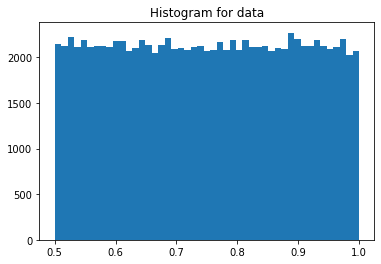

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-2.3772952557', '1.3691551685', '-0.9236523509', '0.6796138883', '-0.5282008052', '0.4262821376', '-0.3536258936', '0.2995716631']
rms error: ['8.2214040756', '5.0852541924', '3.6304581165', '2.7995970249', '2.2648909092', '1.8930553198', '1.6200741529', '1.4114631414']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '-0

In [15]:
point_search(func="log", uniform=True, fxp=False, intwidth=intwidth, fracwidth=fracwidth, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)